In [71]:
import pandas_datareader as pdr
import pandas as pd


In [72]:
df = pd.read_csv('Book.csv')

In [73]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [74]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [75]:
df1 = df.reset_index()['Close']

In [76]:
df1.shape

(2035,)

In [77]:
df1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

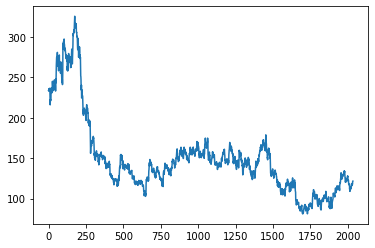

In [78]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [79]:
import numpy as np

In [80]:
from sklearn.preprocessing import MinMaxScaler

In [81]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [82]:
df1.shape

(2035, 1)

In [83]:
df1

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [84]:
# Splitting dataset into train and test split
training_size =int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [85]:
training_size,test_size

(1322, 713)

In [86]:
len(train_data),len(test_data)

(1322, 713)

In [87]:
test_data

array([[0.24652778],
       [0.23611111],
       [0.25204248],
       [0.25919118],
       [0.25776144],
       [0.2681781 ],
       [0.25449346],
       [0.27103758],
       [0.24530229],
       [0.26756536],
       [0.27267157],
       [0.26633987],
       [0.27410131],
       [0.28615196],
       [0.27818627],
       [0.27205882],
       [0.27124183],
       [0.27798203],
       [0.27083333],
       [0.25857843],
       [0.24285131],
       [0.2250817 ],
       [0.23447712],
       [0.24346405],
       [0.23611111],
       [0.22937092],
       [0.21527778],
       [0.20976307],
       [0.20751634],
       [0.2060866 ],
       [0.20445261],
       [0.20098039],
       [0.21180556],
       [0.19301471],
       [0.18974673],
       [0.20302288],
       [0.21752451],
       [0.20629085],
       [0.19158497],
       [0.17381536],
       [0.17401961],
       [0.18361928],
       [0.17830882],
       [0.19362745],
       [0.20098039],
       [0.20486111],
       [0.21425654],
       [0.218

In [88]:
import numpy
def create_dataset(dataset,time_step=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX), numpy.array(dataY)
        

In [89]:
# reshape into X=t, t+1, t+2, t+3 and Y=t+4
time_step = 100
X_train,y_train=create_dataset(train_data,time_step)
X_test,ytest = create_dataset(test_data,time_step)

In [90]:
print(X_train.shape), print(y_train.shape)

(1221, 100)
(1221,)


(None, None)

In [91]:
print(X_test.shape), print(ytest.shape)

(612, 100)
(612,)


(None, None)

In [92]:
pip in

Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "in"



In [93]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [94]:
# Create the stacked LSTM model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [95]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [96]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [97]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 39s 256ms/step - loss: 0.0313 - val_loss: 0.0037
Epoch 2/100
20/20 [==============================] - 4s 196ms/step - loss: 0.0041 - val_loss: 0.0022
Epoch 3/100
20/20 [==============================] - 4s 187ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 4/100
20/20 [==============================] - 3s 170ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 5/100
20/20 [==============================] - 3s 155ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 6/100
20/20 [==============================] - 4s 177ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 7/100
20/20 [==============================] - 4s 179ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 8/100
20/20 [==============================] - 3s 170ms/step - loss: 0.0014 - val_loss: 9.9269e-04
Epoch 9/100
20/20 [==============================] - 3s 171ms/step - loss: 0.0016 - val_loss: 0.0020
Epoch 10/100
20/20 [==============================] - 5s 250ms/step - loss: 0.0017 - v

20/20 [==============================] - 2s 121ms/step - loss: 3.4806e-04 - val_loss: 5.1919e-04
Epoch 77/100
20/20 [==============================] - 2s 121ms/step - loss: 4.0482e-04 - val_loss: 3.0486e-04
Epoch 78/100
20/20 [==============================] - 2s 122ms/step - loss: 3.3794e-04 - val_loss: 2.7627e-04
Epoch 79/100
20/20 [==============================] - 2s 121ms/step - loss: 3.4358e-04 - val_loss: 3.7270e-04
Epoch 80/100
20/20 [==============================] - 2s 122ms/step - loss: 3.6000e-04 - val_loss: 3.1412e-04
Epoch 81/100
20/20 [==============================] - 2s 122ms/step - loss: 3.2989e-04 - val_loss: 2.8528e-04
Epoch 82/100
20/20 [==============================] - 2s 121ms/step - loss: 3.0252e-04 - val_loss: 3.5942e-04
Epoch 83/100
20/20 [==============================] - 2s 124ms/step - loss: 2.9991e-04 - val_loss: 2.8492e-04
Epoch 84/100
20/20 [==============================] - 2s 122ms/step - loss: 3.5799e-04 - val_loss: 3.7357e-04
Epoch 85/100
20/20 [===

In [98]:
import tensorflow as tf

In [99]:
tf.__version__

'2.9.1'

In [100]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

20/20 [==============================] - 1s 25ms/step


In [101]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [102]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

167.69298505333717

In [103]:
math.sqrt(mean_squared_error(ytest,test_predict))


116.80151387321857

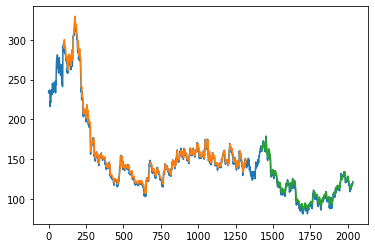

In [104]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [105]:
len(test_data)

713

In [106]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 372)

In [107]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [108]:
temp_input

[0.048815359477124176,
 0.048815359477124176,
 0.05310457516339867,
 0.049632352941176405,
 0.05065359477124176,
 0.05126633986928103,
 0.049632352941176405,
 0.05902777777777779,
 0.055555555555555525,
 0.040849673202614345,
 0.037377450980392135,
 0.037377450980392135,
 0.026552287581699308,
 0.02879901960784309,
 0.03165849673202614,
 0.03165849673202614,
 0.036356209150326724,
 0.022058823529411742,
 0.016748366013071836,
 0.014501633986928053,
 0.022263071895424813,
 0.03615196078431371,
 0.02675653594771238,
 0.03206699346405223,
 0.02696078431372545,
 0.035743464052287566,
 0.03594771241830064,
 0.0404411764705882,
 0.039215686274509776,
 0.044117647058823484,
 0.029820261437908446,
 0.012254901960784326,
 0.012867647058823484,
 0.011437908496731986,
 0.0024509803921567985,
 0.005923202614379064,
 0.0,
 0.007148692810457491,
 0.0042892156862744946,
 0.006740196078431349,
 0.006331699346405206,
 0.011233660130718914,
 0.019607843137254888,
 0.02757352941176472,
 0.030024509803921

In [109]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.04881536 0.05310458 0.04963235 0.05065359 0.05126634 0.04963235
 0.05902778 0.05555556 0.04084967 0.03737745 0.03737745 0.02655229
 0.02879902 0.0316585  0.0316585  0.03635621 0.02205882 0.01674837
 0.01450163 0.02226307 0.03615196 0.02675654 0.03206699 0.02696078
 0.03574346 0.03594771 0.04044118 0.03921569 0.04411765 0.02982026
 0.0122549  0.01286765 0.01143791 0.00245098 0.0059232  0.
 0.00714869 0.00428922 0.0067402  0.0063317  0.01123366 0.01960784
 0.02757353 0.03002451 0.03349673 0.04003268 0.04084967 0.03982843
 0.04166667 0.04370915 0.04758987 0.03594771 0.02839052 0.02410131
 0.01715686 0.01531863 0.01756536 0.02696078 0.02696078 0.03819444
 0.02839052 0.02369281 0.02920752 0.02328431 0.01919935 0.00653595
 0.00061275 0.00796569 0.01245915 0.01981209 0.01940359 0.02246732
 0.03125    0.02348856 0.0249183  0.02144608 0.04840686 0.04575163
 0.03962418 0.03921569 0.04758987 0.04513889 0.04166667 0.04125817
 0.05044935 0.05555556 0.05494281 0.05412582 0.0435049  0.

ValueError: cannot reshape array of size 371 into shape (1,100,1)

In [110]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [111]:
import matplotlib.pyplot as plt

In [112]:
len(df1)

2035

ValueError: x and y must have same first dimension, but have shapes (100,) and (877, 1)

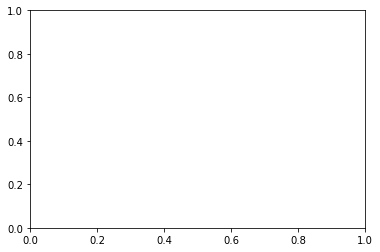

In [113]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

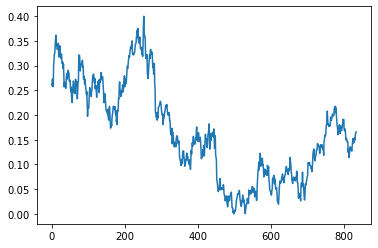

In [114]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [115]:
df3=scaler.inverse_transform(df3).tolist()

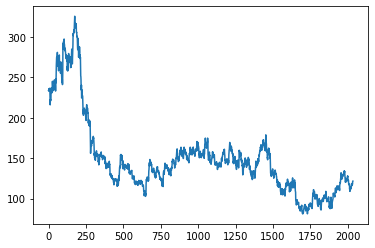

In [116]:
plt.plot(df3)